In [ ]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]
#raw_data.columns = columns
print(data)

       actor_id  label      login        id               node_id  \
0       1081405  Human    dlazesz   1081405  MDQ6VXNlcjEwODE0MDU=   
1      13100598  Human  sarkiroka  13100598  MDQ6VXNlcjEzMTAwNTk4   
2         22494  Human  ZoomQuiet     22494      MDQ6VXNlcjIyNDk0   
3       7648032    Bot   AlCutter   7648032  MDQ6VXNlcjc2NDgwMzI=   
4       2163522  Human    meetyan   2163522  MDQ6VXNlcjIxNjM1MjI=   
...         ...    ...        ...       ...                   ...   
20353   8052756    Bot    tbreeds   8052756  MDQ6VXNlcjgwNTI3NTY=   
20354  34321341  Human     ssisil  34321341  MDQ6VXNlcjM0MzIxMzQx   
20355  15847407  Human   dbfannin  15847407  MDQ6VXNlcjE1ODQ3NDA3   
20356  94929125  Human    jambayk  94929125          U_kgDOBaiA5Q   
20357  18622487    Bot     G3rrus  18622487  MDQ6VXNlcjE4NjIyNDg3   

                                              avatar_url  gravatar_id  \
0      https://avatars.githubusercontent.com/u/108140...          NaN   
1      https://avatars.gi

改列名：raw_data.columns = columns
改行名：raw_data.index = index

In [6]:
# 删除重复行
before_dedup = data.shape  # 删除前的记录数
data = data.drop_duplicates()  # 去重
after_dedup = data.shape  # 删除后的记录数

# 输出去重前后的数据量
print(f"去重前数据量: {before_dedup}")
print(f"去重后数据量: {after_dedup}")


去重前数据量: (20358, 34)
去重后数据量: (19779, 34)


drop_duplicates() 方法去除 DataFrame 中的重复值
通过 subset 参数指定列名
drop_duplicates() 默认保留第一次出现的重复行。如果你想保留最后一次出现的重复行，可以设置 keep='last'
删去所有重复行，keep='False'
使用 shape 属性来获取 DataFrame 的维度，shape 会返回一个元组，其中第一个值是行数，第二个值是列数。

In [7]:
# 删除 'gravatar_id' 列
data = data.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
missing_data_sum = data.isnull().sum()
missing_data_mean = data.isnull().mean() * 100
print("各列缺失值情况：")
print("缺失值数目之和：")
print(missing_data_sum)
print("缺失值数目占比：")
print(missing_data_mean)

各列缺失值情况：
缺失值数目之和：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
缺失值数目占比：
act

In [8]:
#观察可知可以将 hireable, site_admin 等字段转为布尔类型

columns_1 = ['hireable', 'site_admin']
data[columns_1] = data[columns_1].fillna(False).astype(bool)

#填充文本列缺失值
columns_2 = ['name','company','blog','location','email','bio','twitter_username']
data[columns_2] = data[columns_2].fillna(' ')

#处理后缺失值情况
missing_data_after_1 = data.isnull().sum()
missing_data_after_2 = data.isnull().mean() * 100
print(missing_data_after_1)
print(missing_data_after_2)

actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64
actor_id               0.0
label                  0.0
login                  0.0
id                     0.0
node_id                0.0
avatar_url             0.0


fillna()可以用来填补缺失值
interpolate() 方法可以通过插值的方式填补缺失值，适用于数值型数据。 method='linear'；polynomial（多项式插值）；spline（样条插值）

In [15]:
#转换成时间戳
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
print(data[['created_at', 'updated_at']].dtypes)

data['created_at'] = data['created_at'].apply(lambda x: x.timestamp())  
data['updated_at'] = data['updated_at'].apply(lambda x: x.timestamp())  
print(data[['created_at', 'updated_at']].head())

created_at    datetime64[ns]
updated_at    datetime64[ns]
dtype: object
   created_at  updated_at
0    1.317058    1.697196
1    1.435573    1.696660
2    1.220027    1.696213
3    1.400611    1.697115
4    1.345127    1.696594


在 pandas 中，将时间转换成时间戳（即转换为 Unix 时间戳）通常是通过 to_datetime() 和 timestamp() 方法来实现的。Unix 时间戳是从 1970-01-01 00:00:00 UTC 开始的秒数，常用于表示日期和时间。
apply能保证对每个元素应用函数

d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabt

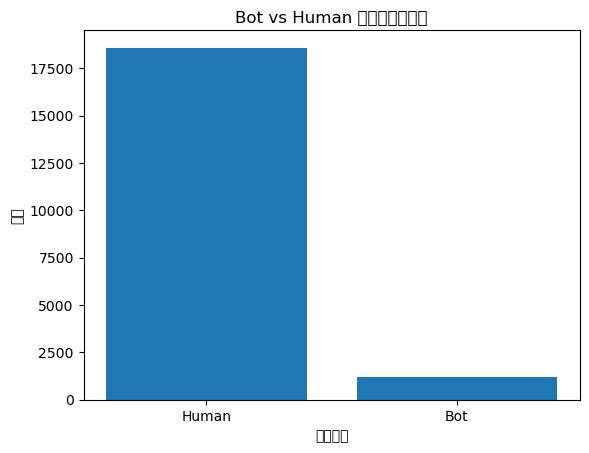

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
#使用柱状图显示 label 列中 Bot 和 Human 的分布情况
label_counts = data['label'].value_counts() #value_counts() 默认按照计数值（出现次数）进行降序排序。
plt.bar(label_counts.index, label_counts.values)
plt.title('Bot vs Human 类型的用户分布')
plt.xlabel('用户类型')
plt.ylabel('数量')
plt.show()

选择理由：柱状图能清晰地展示类别的分布情况，便于对比 Bot 和 Human 类型的数量。并且适合离散数据，展示不同类别的对比。
数据洞察：根据分布结果，可以得知Human用户的比例占绝大多数，Bot用户比例少，二者分布不均衡，差异大。

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(by

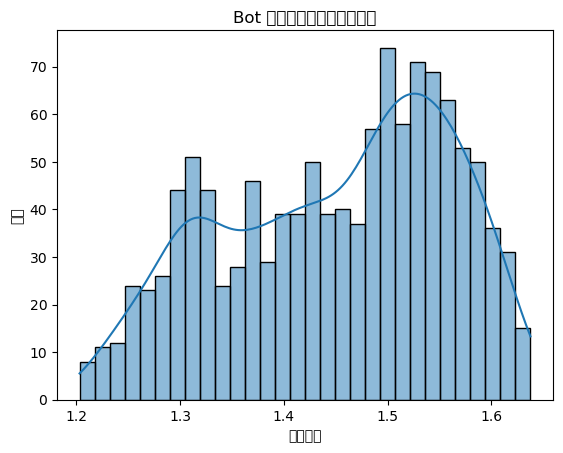

In [16]:
# 过滤出 bot 类型的用户
bot_data = data[data['label'] == 'Bot']

# 可视化 bot 类型账号的创建时间分布
sns.histplot(bot_data['created_at'], kde=True, bins=30)
plt.title('Bot 类型账号的创建时间分布')
plt.xlabel('创建时间')
plt.ylabel('数量')
plt.show()


选择理由：直方图能够展示数据的分布情况，识别数据的集中趋势、离散程度和偏态。通过直方图的展示，我们可以便利的发现Bot用户活跃的时间。再加以核密度估计的手段，在直方图上叠加一个平滑的曲线，以便更好地观察数据的分布形态，能够展示数据的连续性和峰值。
数据洞察：通过观察创建时间的分布，可以看出创建时间呈现先增后降的态势，高峰出现在时间戳为1.5至1.55一段。

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(by

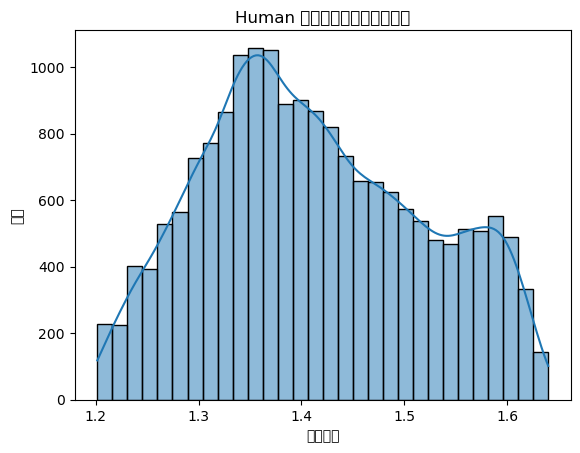

In [17]:
# 过滤出 human 类型的用户
human_data = data[data['label'] == 'Human']

# 可视化 human 类型账号的创建时间分布
sns.histplot(human_data['created_at'], kde=True, bins=30)
plt.title('Human 类型账号的创建时间分布')
plt.xlabel('创建时间')
plt.ylabel('数量')
plt.show()


选择理由同上
数据洞察：可以看出创建时间呈现先增后降的态势，高峰出现在时间戳为1.3至1.4一段。有理由猜测这便是github用户注册的高峰期，并且可以推断这一时期开源概念普及迅速。

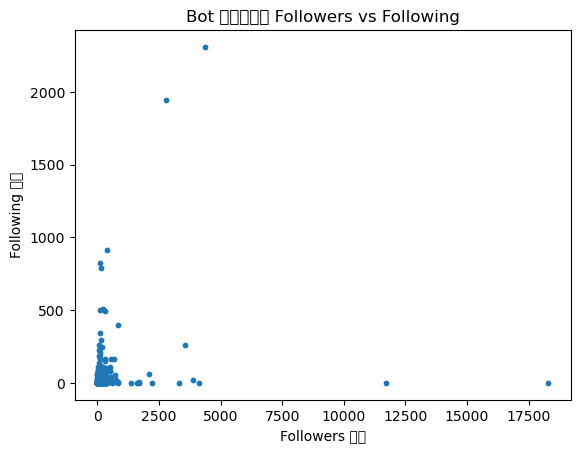

In [26]:
# 可视化 bot 类型账号的 followers 和 following 数量
plt.scatter(x=bot_data['followers'], y=bot_data['following'],s=10)
plt.title('Bot 类型账号的 Followers vs Following')
plt.xlabel('Followers 数量')
plt.ylabel('Following 数量')
plt.show()



选择理由：
散点图适合展示两个变量之间的关系
可以揭示出异常值和群集趋势
并且适用于变量之间的关系分析和异常值检测。
结果分析：一般来说，followers数目和following数目成正相关，并且集群在[0,500]和[0,2500]区间内，大部分数值的follower数目是多于following的。但是也有一些异常值存在

d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\anaconda3\Lib\site-packages\IPython\core\pylabt

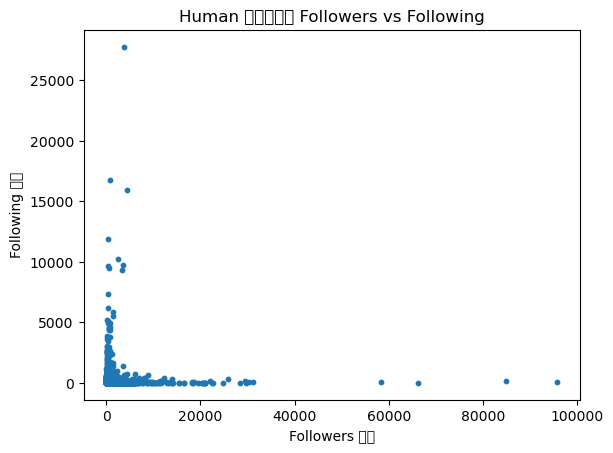

In [27]:
# 可视化 human 类型账号的 followers 和 following 数量
plt.scatter(x=human_data['followers'], y=human_data['following'],s=10)
plt.title('Human 类型账号的 Followers vs Following')
plt.xlabel('Followers 数量')
plt.ylabel('Following 数量')
plt.show()

选择理由同上
结果分析：一般来说，followers数目和following数目成正相关，并且集群在[0,5000]和[0,20000]区间内，但是也有一些异常值存在
数据洞察：这可以帮助我们了解 human 用户的社交行为是否存在特定的趋势，如大部分人关注的数量大于被关注的数量等。